In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def draw_trajectory(transforms_path, ax, color='r', size=20):
    plt.style.use('seaborn-whitegrid')

    with open(transforms_path) as json_file:
        contents = json.load(json_file)
        fovx = contents["camera_angle_x"]
        frames = contents["frames"]
        pos_list = []

        for idx, frame in enumerate(frames):
            c2w = np.array(frame["rot_mat"])
            pos = c2w[:3, 3]  # camera center position
            pos_list.append(pos)
            x_dir = c2w[:3, 0] / (np.linalg.norm(c2w[:3, 0]) + 1e-8)
            y_dir = c2w[:3, 1] / (np.linalg.norm(c2w[:3, 1]) + 1e-8)
            z_dir = c2w[:3, 2] / (np.linalg.norm(c2w[:3, 2]) + 1e-8)
            a = pos + size * x_dir + size * y_dir + size * z_dir
            b = pos - size * x_dir + size * y_dir + size * z_dir
            c = pos - size * x_dir - size * y_dir + size * z_dir
            d = pos + size * x_dir - size * y_dir + size * z_dir

            dir = (a + b + c + d) / 4 - pos  # camera view direction, i.e. z-axis
            dir = dir / (np.linalg.norm(dir) + 1e-8)
            o = pos + dir * 3

            ax.plot([pos[0], o[0]], [pos[1], o[1]], color=color)
            ax.plot([pos[0], a[0]], [pos[1], a[1]], color=color)
            ax.plot([pos[0], b[0]], [pos[1], b[1]], color=color)
            ax.plot([pos[0], c[0]], [pos[1], c[1]], color=color)
            ax.plot([pos[0], d[0]], [pos[1], d[1]], color=color)
            ax.plot([a[0], b[0]], [a[1], b[1]], color=color)
            ax.plot([b[0], c[0]], [b[1], c[1]], color=color)
            ax.plot([c[0], d[0]], [c[1], d[1]], color=color)
            ax.plot([d[0], a[0]], [d[1], a[1]], color=color)

    ax.axis('equal')
    ax.set_xlabel('x/m')
    ax.set_ylabel('y/m')
    
    pos_list = np.array(pos_list)
    min_pos = np.min(pos_list, axis=0)
    max_pos = np.max(pos_list, axis=0)
    print('Min position: {}'.format(min_pos))
    print('Max position: {}'.format(max_pos))

Min position: [-665.3125   50.      250.    ]
Max position: [720. 340. 250.]
Min position: [-980.    0.  250.]
Max position: [870. 390. 250.]


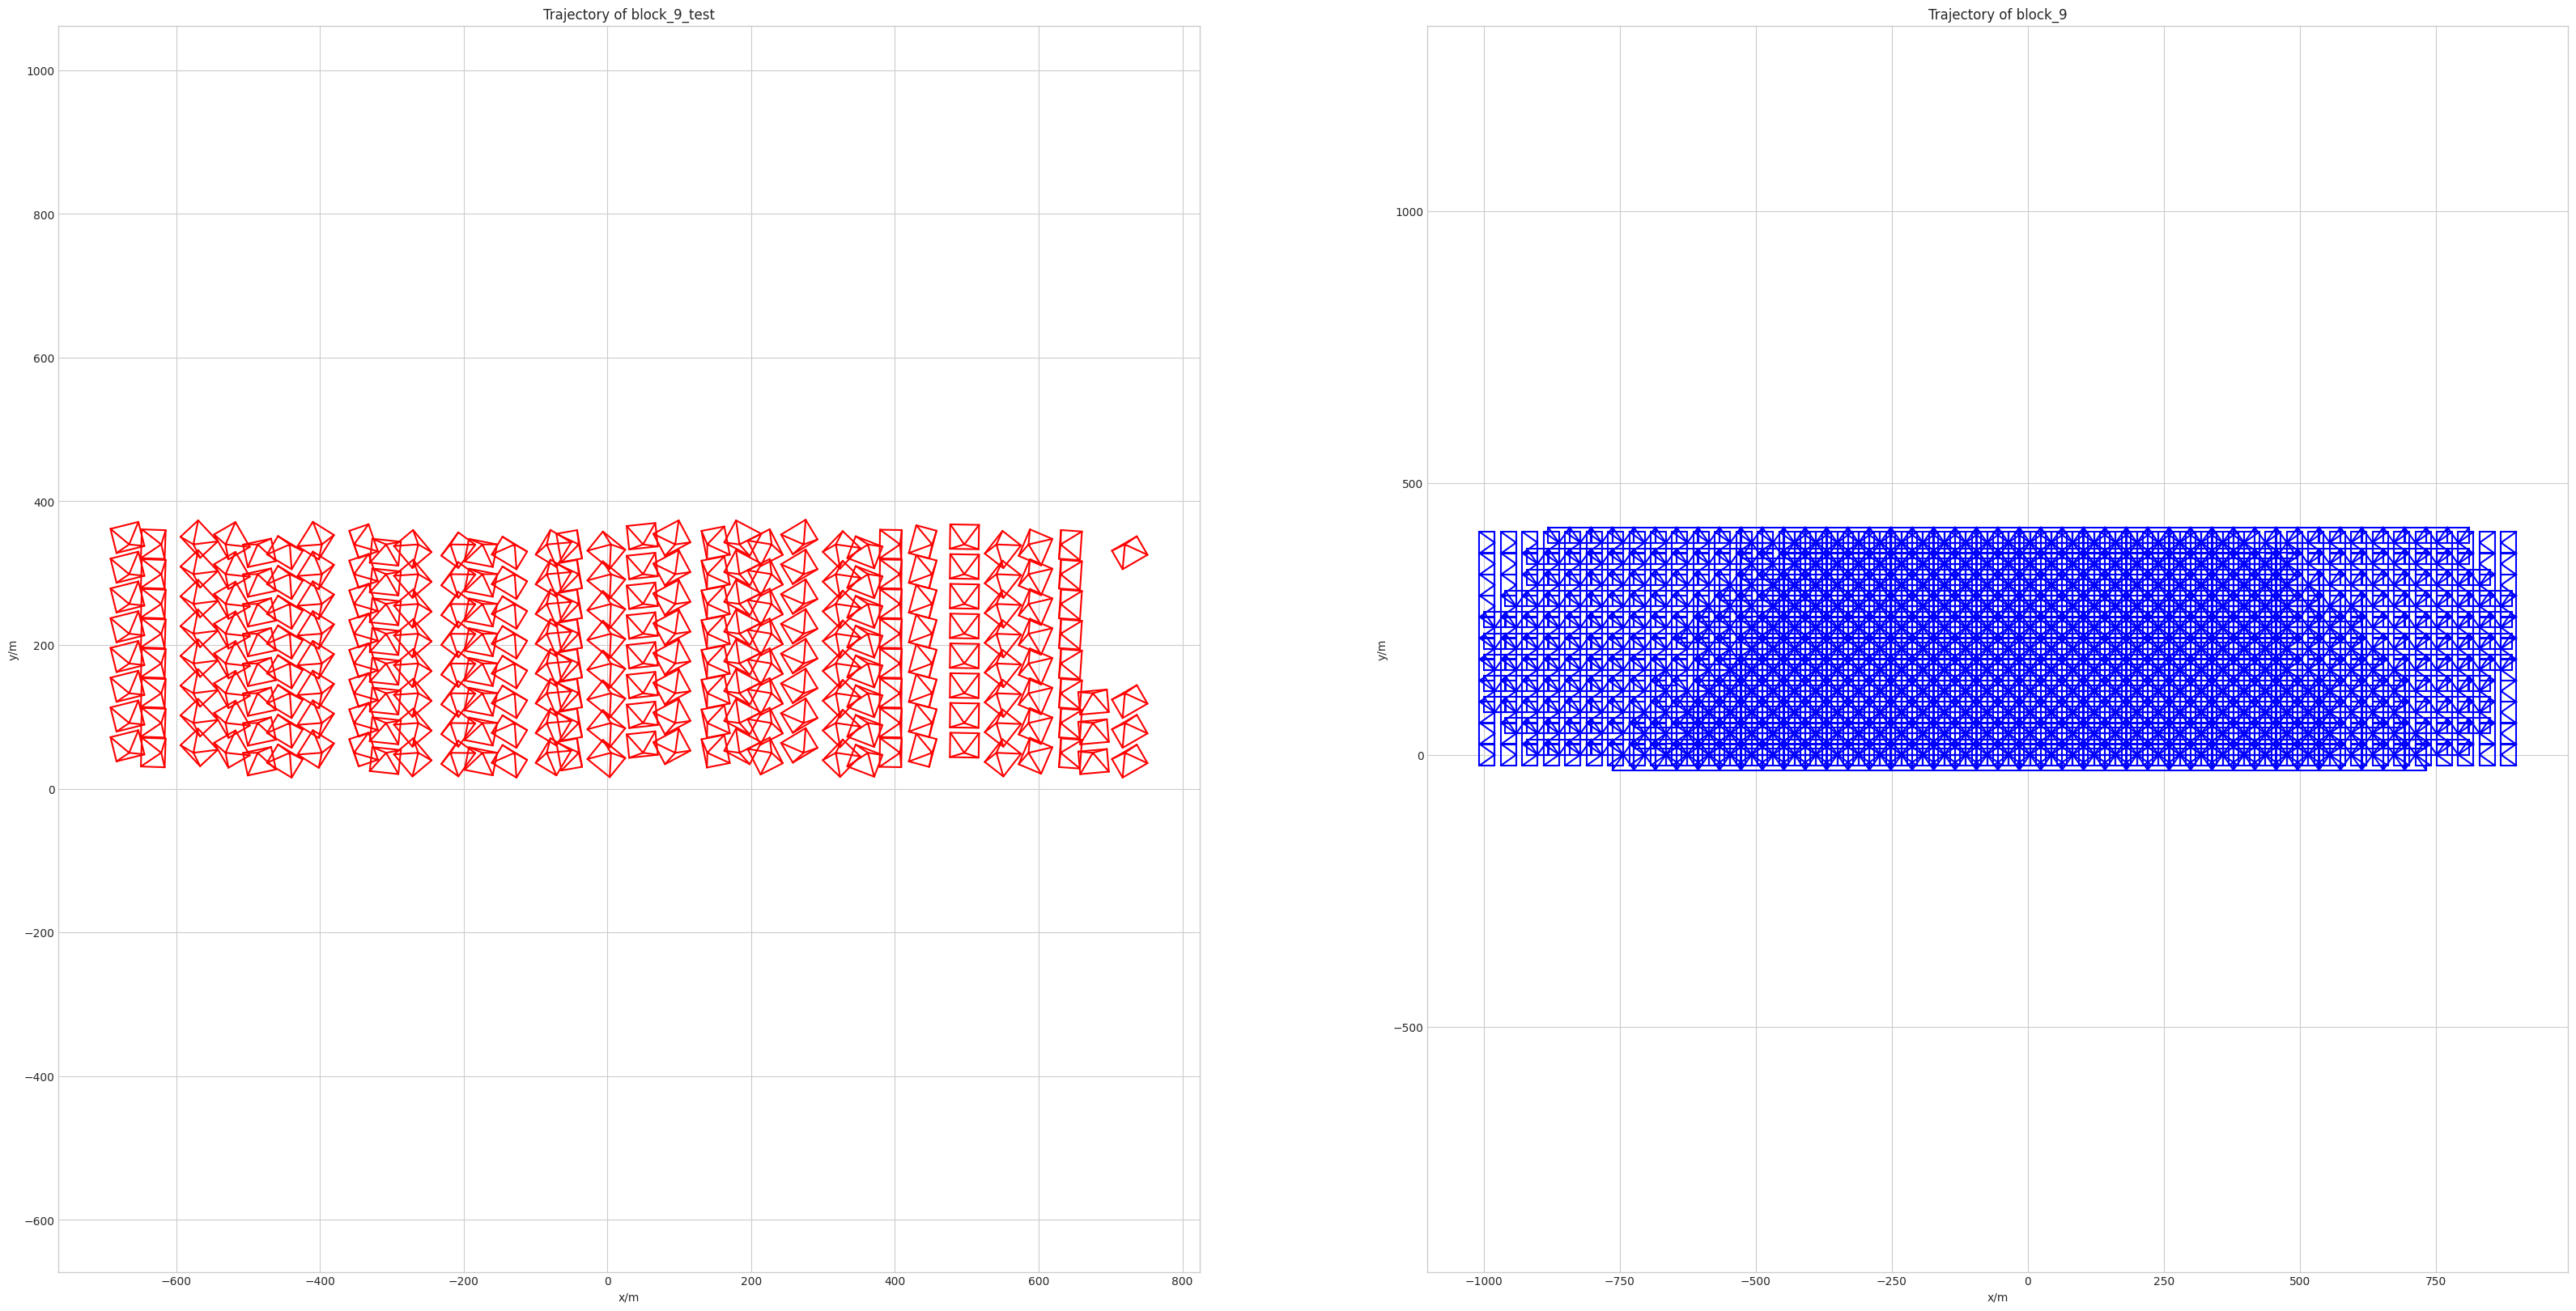

In [16]:
data_path, subset = '../data/matrix_city/aerial', 'block_9'
fig, axs = plt.subplots(1, 2, figsize=(40, 20))

split = 'test'
name = subset + '_test' if split == 'test' else subset
transforms_path = os.path.join(data_path, split, name, 'transforms.json')
axs[0].set_title(f'Trajectory of {name}')
draw_trajectory(transforms_path, axs[0], color='r', size=20)

split = 'train'
name = subset + '_test' if split == 'test' else subset
transforms_path = os.path.join(data_path, split, name, 'transforms.json')
axs[1].set_title(f'Trajectory of {name}')
draw_trajectory(transforms_path, axs[1], color='b', size=20)

plt.show()